# Deterministic Models: Objects in Motion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

print("packages imported")

packages imported


## Learning Goals

* Apply Newton's second law to construct a mathematical model of objects in motion
* Transform a higher order system of differential equations into a first order system
* Approximate solutions of first order systems of differential equations with SciPy
* Describe qualitative properties of solutions of systems of differential equations

## Prelecture Readings

* [MATH 360 > Objects in Motion](https://ubcmath.github.io/MATH360/deterministic/motion/index) including:
  * [Laws of Motion and Forces](http://ubcmath.github.io/MATH360/deterministic/motion/laws-of-motion)
  * [2D Mass Spring System](http://ubcmath.github.io/MATH360/deterministic/motion/mass-spring-2d)
  * [Simple Pendulum](http://ubcmath.github.io/MATH360/deterministic/motion/simple-pendulum)
  * [Planetary Orbits](http://ubcmath.github.io/MATH360/deterministic/motion/orbits)
  * [Euler's 3-Body Problem](http://ubcmath.github.io/MATH360/deterministic/motion/eulers-3-body)

## Note About Nondimensionalization

From the coupled mass spring system, we arrive at the nondimensionalized differential equations:
\begin{align*}
\frac{d^2 x_1^*}{dt^{*2}} &= \frac{k[t]^2}{m_1 [x_1]} ([x_2]x_2^* - [x_1]x_1^*), \\
\frac{d^2 x_2^*}{dt^{*2}} &= -\frac{k[t]^2}{m_2 [x_2]} ([x_2]x_2^* - [x_1]x_1^*). 
\end{align*}

Here, we cannot make much progress, since we are unable to make much progress, since $x_1$ and $x_2$ have separate scaling factors.  This is a coupled mass spring system, so the positions of $x_1$ and $x_2$ should have the same units and should have similar magnitudes (in terms of scale).  This means that we can scale both $x_1$ and $x_2$ by the same scaling factor, and, hence, $[x_1] = [x_2] = [c].$

Notice how this now allows us to factor $[c]$ out of the brackets on the right-hand side of each equation and then subsequently cancel with the $[c]$ in the denominator of the fraction.

This type of simplification is possible, however, there needs to be a justification for *why* this can be done (like the explanation above).

### General Equations and Constituitive Relations

**Governing Equations:** 
- Generally come from a conservation principle.  E.g.,
    - Conservation of Mass,
    - Conservation of Energy,
    - Conservation of Momentum,
    - Conservation of People.
- Can also come from a Free Energy formulation.
    - Free Energy is the amount of energy that a system has to do something.
    - We will not be considering Free Energy formulations in Math 360.
- The conservation principle or free energy argument is what gives the model the support for *why* the model should be true.
    - Models that are not backed by a concervation principle or free energy argument can exist, however, it is more difficult to justify their results as true. 

**Constitutive Relations:**
- Help connect the conservation principle to the specific configuration we are interested in. (In the case of a Free Energy formulation, constituitive relations help us determine how to write down the energy components of the system).
- Are generally a relationship between 2 quantites.
    - Often couple a quantity from a material to its flux/movement in the system.
- Generally hard to determine.
    - Often are derived from 1st principles.
        - E.g., from statistical physics, thermodynamics, kinetic theory, quantum mechanics. 
    - Some are empirical formulas, but it is preferred to have relations derived from 1st principles to give the constitutive relation support for its formulation.
        - In some cases, the empirical formula is developed and the 1st principles argument follows.

### Activity

Form groups of $2-4$ of your choosing.  You must work in a group with at least one other person to receive the participation credit for today's activity. 

In your groups, think of an example of an **object in motion** that is not a previously given example in the pre-readings or in the examples below.  Then work through the first three steps of the modelling process:
- Write an explicit problem statement describing the system
- Identify variables and parameters
- Make assumptions and identify constraints.

Submit your answers to the Canvas Assignment "Lecture 7".  **Each group member should submit a copy of their group's work.**


**As a reminder, submitting any work and/or ideas that stem from the use of Artificial Intelligence (ChatGPT, Claude, etc) or LLMs in Math 360 is academic dishonesty.** 

Your solution should have the format:

Group member names: First name, Last name; First name, Last name; First name, Last name; First name, Last name

Problem statement:

Variables and parameters:

Assumptions and constraints:

## Forced Oscillations

Consider a mass spring damper system

$$
mx'' + cx' + kx = F(t)
$$

such that the forcing function is

$$
F(t) = F_0 \, \mathrm{square}(w t)
$$

where $\mathrm{square}(t)$ is the square wave with period $2 \pi$. In other words, $\mathrm{square}(t)$ and is given by

$$
\mathrm{square}(t) = \left\{ \begin{array}{cc} +1 & 0 < t < \pi \\ -1 & \pi < t < 2 \pi \end{array} \right.
$$

on the interval $[0,2\pi]$. See the figure below.

* Apply the nondimensionalization procecedure. (Assume initial conditions $x(0) = x_0$ and $x'(0) = 0$.)
* Use `scipy.integrate.odeint` to simulate the system.
* Describe the behaviour of the system for different values of the parameters.

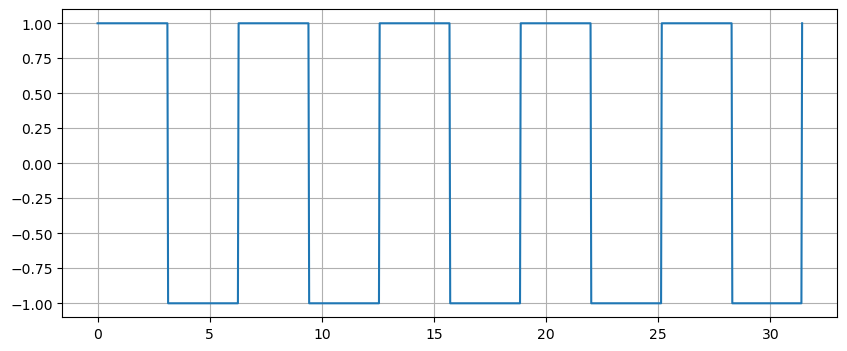

In [2]:
from scipy.signal import square

t = np.linspace(0,10*np.pi,1000)
plt.figure(figsize=(10,4))
plt.plot(t,square(t)), plt.grid(True)
plt.show()

**Solution.** 
Our equation to nondimensionalize is:
$$
mx'' + cx' + kx = F_0 \, \mathrm{square}(w t).
$$
We have to variables to scale: $t$ and $x$.  Let $x = [x]x^*$ and $t = [t] t^*$, and plug these into the equation:

\begin{align*}
mx^{* \prime\prime}\frac{[x]}{[t]^2} + cx^{* \prime}\frac{[x]}{[t]} + k[x]x^* &= F_0 \, \mathrm{square}(w [t] t^*)  \\
\implies x^{* \prime\prime} + \frac{c [t] }{m} x^{* \prime} + \frac{k [t]^2 }{m} x^* &= F_0 \frac{[t]^2}{m [x]}  \, \mathrm{square}(w [t]t^*). 
\end{align*}

We have two choices for $[t]$: $\sqrt{\frac{m}{k}}$ or $\frac{m}{c}$.  For mass-spring-damper systems, we often have $c \approx 0$, so choosing $[t] = \sqrt{\frac{m}{k}}$ is preferred.

For $[x]$, this only appears on the right-hand side of the equation and havs $[t]$ in it.  Let's add our chosen $[t]$:
\begin{align*}
F_0 \frac{[t]^2}{m [x]} & = F_0 \frac{\frac{m}{k}}{m [x]}\\
& = \frac{F_0}{k [x]}.
\end{align*}

Our choice for $[x]$ is then $\frac{F_0}{k}$.

Our nondimensionalized DE is then:

\begin{align*}
\frac{d^2x^*}{dt^{*2}} + \frac{c \sqrt{\frac{m}{k}} }{m} \frac{dx^*}{dt^*}  +  x^* &=  \mathrm{square}(w \sqrt{\frac{m}{k}} t^*) \\ 
\frac{d^2x^*}{dt^{*2}} + \frac{c }{\sqrt{mk}} \frac{dx^*}{dt^*}  +  x^* &=  \mathrm{square}(w \sqrt{\frac{m}{k}} t^*) \\ 
\implies \frac{d^2x^*}{dt^{*2}} + \zeta \frac{dx^*}{dt^*} + x^* &= \mathrm{square}(\omega t^*),\\
\end{align*}

where $\zeta = c/\sqrt{mk}$ and $\omega = w \sqrt{m/k}$.

Note: it can be helpful to relabel some of the constants as a single parameter to help with the implementation!

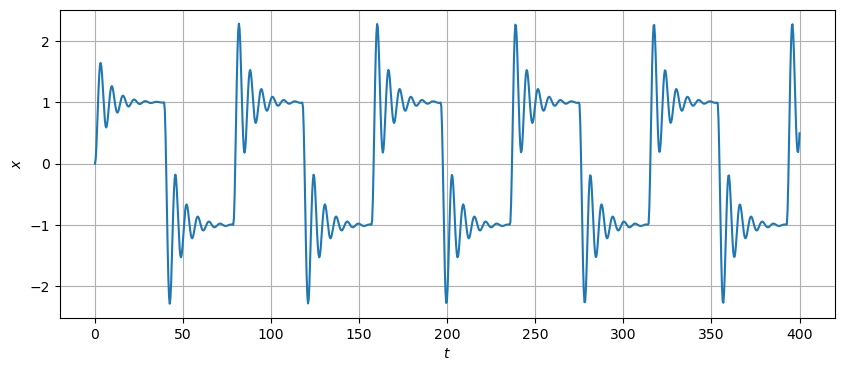

In [3]:
w = 0.08
z = 0.28
f = lambda u,t: np.array([u[1],-z*u[1]-u[0]+square(w*t)])
t = np.linspace(0,400,1000)
u0 = [0.,0.]
u = spi.odeint(f,u0,t)

plt.figure(figsize=(10,4))
plt.plot(t,u[:,0])
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.grid(True)
plt.show()

# try playing around with different w and z values to see how they affect the square wave! 
# In some instances, we may see the square wave completely disappear.

## Nonlinear Spring Forces

Suppose a mass is attached to a spring such that the magnitude of the force when the spring is stretched/compressed by distance $x$ is given by

$$
F = k|x|^{\alpha}
$$

where $k$ is a spring coefficient and $\alpha > 0$.

* Find the equation of motion for the system and apply the nondimensionalization procecedure. (Assume initial conditions $x(0) = x_0$ and $x'(0) = 0$.)
* Use `scipy.integrate.odeint` to simulate the system for different exponents $\alpha$. The function `np.sign` may be helpful (see [documentation](https://numpy.org/doc/stable/reference/generated/numpy.sign.html)).
* Describe the behaviour of the system for larger values of $\alpha$.

**Solution.** 
Let's first fill in the left-hand side of the equation -- $F = ma$, with $a = \dfrac{d^2 x}{dt^2}$ the acceleration and $m$ the mass.  Our equation is then: 
$$ m\frac{d^2 x}{dt^2}  = k|x|^{\alpha}. $$

We have $x$ and $t$ as the variables, and define $x = [x]x^*$ and $t = [t] t^*$.   Plug these in to the equation:
\begin{align*}
m\frac{d^2 x^* }{dt^{*2}} \frac{[x]}{[t]^2}  &= -  k|x^* [x]|^{\alpha} \\
\implies \frac{d^2 x^* }{dt^{*2}} &= - \frac{k}{m}  \frac{[t]^2}{[x]} |x^* [x]|^{\alpha}.
\end{align*}
Why the negative? Typically spring force comes with as a $-kx$ term (this depends on how the positive direction of $x$!).

Here, we have one coefficient that contains both $[t]$ and $[x]$.  To determine $[x]$, we will look at the initial condition:
\begin{align*}
x(0) & = x_0\\
[x] x^*(0) & = x_0\\
x^*(0) & = \frac{x_0}{[x]} 
\end{align*}
and choose $[x] = x_0.$

Before we can pick our nondimensionalization for $[t]$, we need to deal with the $|x^* [x]|^{\alpha}$ term.  We know that $|ab|^c = |a|^c|b|^c$ and can use this to separate out the $x^*$ and the $[x]$ inside the absolute value.
\begin{align*}
\frac{d^2 x^* }{dt^{*2}} &= - \frac{k}{m}  \frac{[t]^2}{[x]} | [x]|^{\alpha} |x^*|^{\alpha} \\
\end{align*}
Then use the sign function and the property that $|x| = x \mathrm{sgn}(x)$ to write:
\begin{align*}
\frac{d^2 x^* }{dt^{*2}} &= - \frac{k}{m}  \frac{[t]^2}{[x]^{\alpha - 1}} \mathrm{sgn}(x^*)|x^*|^{\alpha}. \\
\end{align*}
Note here that the sign function can only be applied to a variable and that the sign of $[x]$ is given by $x^*.$

Our choice for $[t]$ is then $[t] = \sqrt{\frac{mx_0^{\alpha - 1}}{k}}.$ The nondimensionalized equation and initial conditions are:

$$
\frac{d^2x^*}{dt^{*2}} = - \mathrm{sgn}(x^*) |x^*|^{\alpha} \ , \ \ x^*(0) = 1 \ , \ \ \frac{dx^*}{dt^*}(0) = 0.
$$

where $\mathrm{sgn}(x^*) = 1$ if $x^*>0$, $\mathrm{sgn}(x^*) =-1$ if $x^*<0$ and $\mathrm{sgn}(x^*) = 0$ if $x^*=0$.

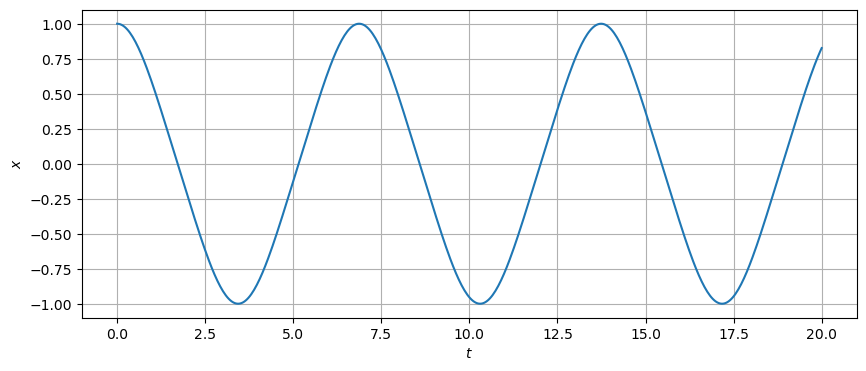

In [4]:
alpha = 2.
f = lambda u,t: np.array([u[1],-np.sign(u[0])*np.abs(u[0])**alpha])
u0 = [1.,0.]
t = np.linspace(0,20,500)
u = spi.odeint(f,u0,t)
plt.figure(figsize=(10,4))
plt.plot(t,u[:,0]) 
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.grid(True)
plt.show()

##Try playing around with the alpha value to see how it affects the plot!

## 2D Mass Double Spring System

A flat object slides over a flat surface. There are two springs such that each is attached to the object at one end and fixed at the other end (see figure below). Construct a mathematical model of the motion of the object.

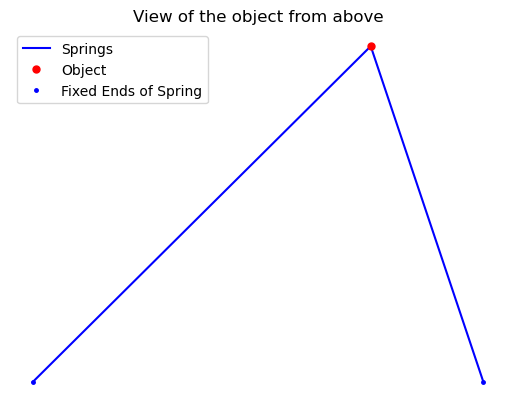

In [10]:
x = [-1,0.5,1]
y = [0,1,0]
plt.plot(x,y,'b')
plt.plot(x[1],y[1],'r.',ms=10)
plt.plot([x[0],x[2]],[y[0],y[2]],'b.',ms=5)
plt.title('View of the object from above')
plt.legend(['Springs','Object','Fixed Ends of Spring'])
plt.axis('off')
plt.show()

**Solution:**

**Problem Statement:** Simulate the motion for two springs in the given configuration.

**Variables and Parameters**

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| position of the object in $x$-direction | $x$ | L | dependent variable |
| position of the object in $y$-direction | $y$ | L | dependent variable |
| time | $t$ | T | independent variable |
| spring constant | $k$ | MT<sup>-2</sup> | parameter |
| equilibrium length of springs | $L$ | L | parameter |
| initial position in $x$-direction | $x_0$ | L | parameter |
| initial position in $y$-direction | $y_0$ | L | parameter |
| distance from origin to fixed end of spring | $d$ | L | parameter |

**Assumptions and Constraints**

* object is flat
* surface is flat
* springs are identical
* no damping or friction
* springs are fixed at position $(\pm d,0)$ in the $xy$-plane

**Build Solutions**

The spring force can be rewritten as $F = k (L-x),$ where $L$ is the equilibrium (or rest) position of the spring. Using Pythagoean Theorem, we can calculate the length of each spring (the blue line segments) as $\sqrt{(x - d)^2 + y^2}$ and $\sqrt{(x + d)^2 + y^2}.$  Here, when calculating the spring force, we will also need a normalized vector to indicate the direction of the motion.  For our springs, these are: $\big\langle \frac{x-d}{\sqrt{(x - d)^2 + y^2}} , \frac{y}{\sqrt{(x - d)^2 + y^2}} \big\rangle$ and $\big\langle \frac{x+d}{\sqrt{(x + d)^2 + y^2}} , \frac{y}{\sqrt{(x - d)^2 + y^2}} \big\rangle.$

Tip: Try drawing the spring system on a coordinate plane to help with the geometry.

Then, the force of spring 1 is given by:

$$
F_1 = k \left( L - \sqrt{(x - d)^2 + y^2} \right) \bigg\langle \frac{x-d}{\sqrt{(x - d)^2 + y^2}} , \frac{y}{\sqrt{(x - d)^2 + y^2}} \bigg\rangle
$$

and the force of spring 2 is:

$$
F_2 = k \left( L - \sqrt{(x + d)^2 + y^2} \right) \bigg\langle  \frac{x + d}{\sqrt{(x + d)^2 + y^2}} , \frac{y}{\sqrt{(x + d)^2 + y^2}} \bigg\rangle.
$$

The total force is then $F = F_1 + F_2.$

We then end up with two equations of motion: one for the $x$ direction and one for the $y$ direction:

\begin{align*}
m \frac{d^2x}{dt^2} &= k \left( L - \sqrt{(x - d)^2 + y^2} \right)\frac{x-d}{\sqrt{(x - d)^2 + y^2}} + k \left( L - \sqrt{(x + d)^2 + y^2} \right) \left( \frac{x + d}{\sqrt{(x + d)^2 + y^2}} \right) \\
m \frac{d^2y}{dt^2} &= k \left( L - \sqrt{(x - d)^2 + y^2} \right)\frac{y}{\sqrt{(x - d)^2 + y^2}} + k \left( L - \sqrt{(x + d)^2 + y^2} \right) \left( \frac{y}{\sqrt{(x + d)^2 + y^2}} \right),
\end{align*}

which come from the components of the vectors, and using $F = m \dfrac{d^2 x }{dt^2}.$

*Nondimensionalization*

We have variables $x,y,$ and $t$.  Define $x = [x]x^*,$ $y = [y]y^*,$ and $t = [t]t^*,$  and substitute these into the equation.

\begin{align*}
m\frac{d^2 x^* }{dt^{*2}} \frac{[x]}{[t]^2} &= k \left( L - \sqrt{([x]x^* - d)^2 + ([y]y^*)^2} \right)\frac{[x]x^*-d}{\sqrt{([x]x^* - d)^2 + ([y]y^*)^2}} + k \left( L - \sqrt{([x]x^* + d)^2 + y^2} \right) \left( \frac{[x]x^* + d}{\sqrt{([x]x^* + d)^2 + ([y]y^*)^2}} \right) \\
m\frac{d^2 y^* }{dt^{*2}} \frac{[y]}{[t]^2} &= k \left( L - \sqrt{([x]x^* - d)^2 + ([y]y^*)^2} \right)\frac{[y]y^*}{\sqrt{([x]x^* - d)^2 + ([y]y^*)^2}} + k \left( L - \sqrt{([x]x^* + d)^2 + ([y]y^*)^2} \right) \left( \frac{[y]y^*}{\sqrt{([x]x^* + d)^2 + ([y]y^*)^2}} \right).
\end{align*}

The highest order term is the second derivative, so divide off the constant in front of it.

\begin{align*}
\frac{d^2 x^* }{dt^{*2}} &= k\frac{[t]^2}{m[x]} \left( L - \sqrt{([x]x^* - d)^2 + ([y]y^*)^2} \right)\frac{[x]x^*-d}{\sqrt{([x]x^* - d)^2 + ([y]y^*)^2}} + k\frac{[t]^2}{m[x]} \left( L - \sqrt{([x]x^* + d)^2 + y^2} \right) \left( \frac{[x]x^* + d}{\sqrt{([x]x^* + d)^2 + ([y]y^*)^2}} \right) \\
\frac{d^2 y^* }{dt^{*2}} &= k \frac{[t]^2}{m[y]} \left( L - \sqrt{([x]x^* - d)^2 + ([y]y^*)^2} \right)\frac{[y]y^*}{\sqrt{([x]x^* - d)^2 + ([y]y^*)^2}} + k \frac{[t]^2}{m[y]} \left( L - \sqrt{([x]x^* + d)^2 + ([y]y^*)^2} \right) \left( \frac{[y]y^*}{\sqrt{([x]x^* + d)^2 + ([y]y^*)^2}} \right).
\end{align*}
The equations here have a term $([x]x^* - d)^2$, and for our model, it would be helpful to have this be $(x^* - 1)^2.$  This can be accomplished by choosing $[x]=d$. We know $[x]$ and $[y]$ should have the same units, as they are measuring the 'components' of the distance of the geometry, so if $[x]=d$, then we will choose $[y]=d$.

Our equations upon substitution of $[x]=[y]=d$ and simplification are then: 

\begin{align*}
\frac{d^2x^*}{dt^{*2}} &= k\frac{[t]^2}{md}  \left( L - d\sqrt{(x^* - 1)^2 + y^{*2}} \right)\frac{x^*-1}{\sqrt{(x^* - 1)^2 + y^{*2}}} + k\frac{[t]^2}{md} \left( L - d\sqrt{(x^* + 1)^2 + y^{*2}} \right) \left( \frac{x^* + 1}{\sqrt{(x^* + 1)^2 + y^{*2}}} \right) \\
\frac{d^2y^*}{dt^{*2}} &= k\frac{[t]^2}{md} \left( L - d\sqrt{(x^* - 1)^2 + y^{*2}} \right)\frac{y^*}{\sqrt{(x^* - 1)^2 + y^{*2}}} + k\frac{[t]^2}{md} \left( L - d \sqrt{(x^* + 1)^2 + y^{*2}} \right) \left( \frac{y^*}{\sqrt{(x^* + 1)^2 + y^{*2}}} \right).
\end{align*}

Note: Here we can almost cancel the $d$ in the $k\dfrac{[t]^2}{md}$ term.  If we factor a $d$ out of the adjacent brackets and write $L/d$, then our term for $[t]$ will be a bit nicer!

\begin{align*}
\frac{d^2x^*}{dt^{*2}} &= k\frac{[t]^2}{m}  \left( L/d - \sqrt{(x^* - 1)^2 + y^{*2}} \right)\frac{x^*-1}{\sqrt{(x^* - 1)^2 + y^{*2}}} + k\frac{[t]^2}{m} \left( L/d - \sqrt{(x^* + 1)^2 + y^{*2}} \right) \left( \frac{x^* + 1}{\sqrt{(x^* + 1)^2 + y^{*2}}} \right) \\
\frac{d^2y^*}{dt^{*2}} &= k\frac{[t]^2}{m} \left( L/d - \sqrt{(x^* - 1)^2 + y^{*2}} \right)\frac{y^*}{\sqrt{(x^* - 1)^2 + y^{*2}}} + k\frac{[t]^2}{m} \left( L/d - \sqrt{(x^* + 1)^2 + y^{*2}} \right) \left( \frac{y^*}{\sqrt{(x^* + 1)^2 + y^{*2}}} \right)
\end{align*}

We can then choose $[t] = \sqrt{m/k}.$  Our nondimensional system is then:
\begin{align*}
\frac{d^2x^*}{dt^{*2}} &= \left( L^* - \sqrt{(x^* - 1)^2 + y^{*2}} \right)\frac{x^*-1}{\sqrt{(x^* - 1)^2 + y^{*2}}} + \left( L^* - \sqrt{(x^* + 1)^2 + y^{*2}} \right) \left( \frac{x^* + 1}{\sqrt{(x^* + 1)^2 + y^{*2}}} \right) \\
\frac{d^2y^*}{dt^{*2}} &= \left( L^* - \sqrt{(x^* - 1)^2 + y^{*2}} \right)\frac{y^*}{\sqrt{(x^* - 1)^2 + y^{*2}}} + \left( L^* - \sqrt{(x^* + 1)^2 + y^{*2}} \right) \left( \frac{y^*}{\sqrt{(x^* + 1)^2 + y^{*2}}} \right).
\end{align*}

where $L^* = L/d$.

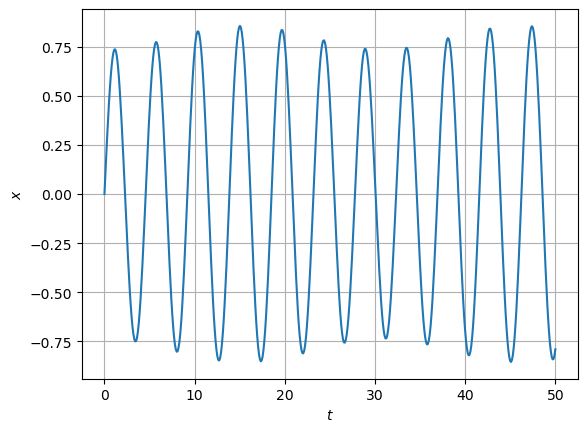

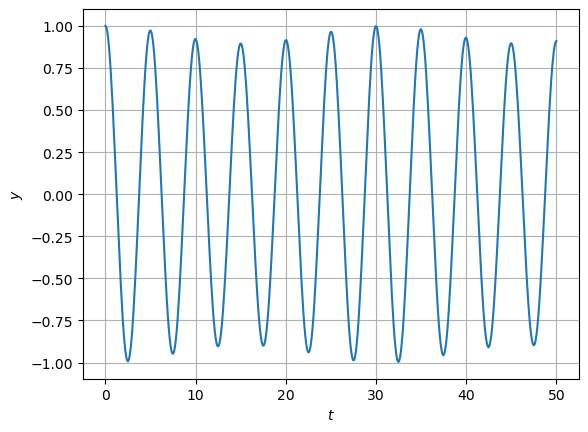

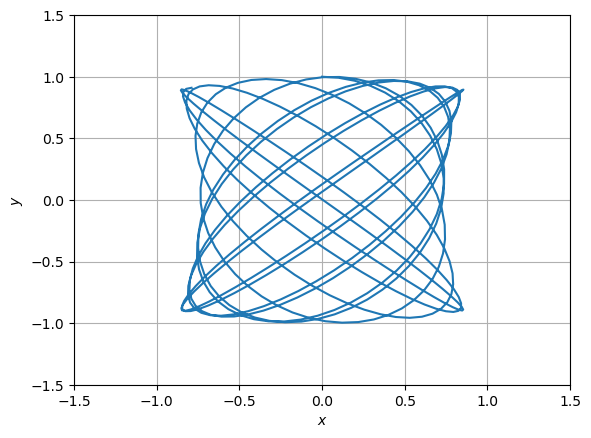

In [11]:
L = 0.25
def f(u,t):
    dudt = np.array([0.,0.,0.,0.])
    D1 = np.sqrt((u[0] - 1)**2 + u[2]**2)
    D2 = np.sqrt((u[0] + 1)**2 + u[2]**2)
    dudt[0] = u[1]
    dudt[1] = (L/D1 - 1)*(u[0] - 1) + (L/D2 - 1)*(u[0] + 1)
    dudt[2] = u[3]
    dudt[3] = (L/D1 - 1)*u[2] + (L/D2 - 1)*u[2]
    return dudt

t = np.linspace(0,50,500)
u0 = [0.,1.,1.,0.]
u = spi.odeint(f,u0,t)

plt.plot(t,u[:,0])
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.grid(True)
plt.show()

plt.plot(t,u[:,2])
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()


plt.plot(u[:,0],u[:,2])
plt.axis([-1.5,1.5,-1.5,1.5])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

**Analysis**

Some questions to use as a launch point for the analysis:
- Does the solution seem reasonable?
- Does the solution answer the problem statement?
- How does the value of $L^*$ affect the motion of the springs?
- How does the initial condition `u0` affect the motion of the springs?
- This system results in a fairly complex system of DEs.  Is the complexity appropriate to answer the problem?